In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [2]:
base_dir='train'
# Create datasets
train_datagen = image_dataset_from_directory(
    base_dir,
    image_size=(275, 275),
    subset='training',
    seed=1,
    validation_split=0.2,  # Split 20% for validation
    batch_size=32
)

val_datagen = image_dataset_from_directory(
    base_dir,
    image_size=(275, 275),
    subset='validation',
    seed=1,
    validation_split=0.1,  # Split 20% for validation
    batch_size=32
)

test_datagen = image_dataset_from_directory(
    base_dir,
    image_size=(275, 275),
    subset='validation',  # Use the validation set as the test set
    seed=1,
    validation_split=0.1,  # No need to split further
    batch_size=32
)


Found 557 files belonging to 2 classes.
Using 446 files for training.
Found 557 files belonging to 2 classes.
Using 55 files for validation.
Found 557 files belonging to 2 classes.
Using 55 files for validation.


In [3]:
features = []
labels = []

for images, labels_batch in train_datagen:
    features.extend(images.numpy())
    labels.extend(labels_batch.numpy())

# Convert lists to numpy arrays
x_train = np.array(features)
y_train = np.array(labels)

In [40]:
features = []
labels = []

for images,label in val_datagen:
    features.extend(images.numpy())
    labels.extend(images.numpy())

x_cv=np.array(features)
y_cv=np.array(labels)

In [42]:
def build_model():
    input_size = (275, 275, 3)
    tf.random.set_seed(42)

    model_1 = Sequential([
        Flatten(input_shape=input_size),
        Dense(units=275, activation='relu', name='layer_1'),
        Dense(units=128, activation='relu', name='layer_2'),
        Dense(units=1, activation='linear', name='layer_3')
    ], name='model_1')

    model_2 = Sequential([
        Flatten(input_shape=input_size),
        Dense(units=640, activation='relu', name='layer_1'),
        Dense(units=325, activation='relu', name='layer_2'),
        Dense(units=120, activation='relu', name='layer_3'),
        Dense(units=1, activation='linear', name='layer_4')
    ], name='model_2')

    model_3 = Sequential([
        Flatten(input_shape=input_size),
        Dense(units=275, activation='relu', name='layer_1'),
        Dense(units=168, activation='relu', name='layer_2'),
        Dense(units=84, activation='relu', name='layer_3'),
        Dense(units=42, activation='relu', name='layer_4'),
        Dense(units=21, activation='relu', name='layer_5'),
        Dense(units=1, activation='linear', name='layer_6')
    ], name='model_3')

    model_4 = Sequential([
        Flatten(input_shape=input_size),
        Dense(units=640, activation='relu', name='layer_1'),
        Dense(units=325, activation='relu', name='layer_2'),
        Dense(units=240, activation='relu', name='layer_3'),
        Dense(units=120, activation='relu', name='layer_4'),
        Dense(units=120, activation='relu', name='layer_5'),
        Dense(units=40, activation='relu', name='layer_6'),
        Dense(units=20, activation='relu', name='layer_7'),
        Dense(units=1, activation='linear', name='layer_8')
    ], name='model_4')

    return [model_1, model_2, model_3, model_4]

In [44]:
J_trains=[]
J_cvs=[]
histories=[]
models=build_model()
for model in models:
    model.compile(optimizer=Adam(learning_rate=8e-3),loss=BinaryCrossentropy(from_logits=True))

    print(f"Training model {model.name}..........")
    history=model.fit(x_train,y_train,epochs=10,verbose=0)
    print("Done....!")
    histories.append(history)

    
    #J_train
    logits=model.predict(x_train)
    yhat_train=tf.nn.sigmoid(logits)
    yhat_train=np.where(yhat_train>=0.5,1,0)
    J_train=np.mean(yhat_train!=y_train)
    J_trains.append(J_train)

    #J_cv
    logits=model.predict(x_cv)
    yhat_cv=tf.nn.sigmoid(logits)
    yhat_cv=np.where(yhat_cv>=0.5,1,0)
    J_cv=np.mean(yhat_cv!=y_cv)
    J_cvs.append(J_cv)



c:\Users\adith\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training model model_1..........
Done....!
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Training model model_2..........


C:\Users\adith\AppData\Local\Temp\ipykernel_23248\1349222911.py:25: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  J_cv=np.mean(yhat_cv!=y_cv)


Done....!
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Training model model_3..........
Done....!
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Training model model_4..........
Done....!
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


In [47]:
print("RESULTS ======>")
for i in range(len(J_trains)):
    print(f"{models[i].name}....... : " + 
          f"J_train = {J_trains[i]}  " +
          f"J_cv = {J_cvs[i]}  ")

RESULTS ======>
model_1....... : J_train = 0.5040419071366808  J_cv = 1.0  
model_2....... : J_train = 0.5040016891552213  J_cv = 1.0  
model_3....... : J_train = 0.4973456132236723  J_cv = 1.0  
model_4....... : J_train = 0.5044843049327354  J_cv = 1.0  


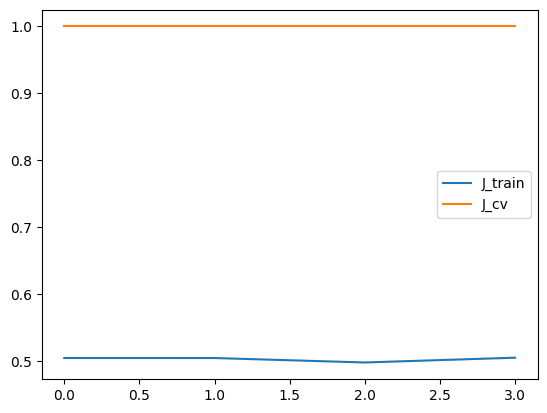

In [49]:
x_axis=np.arange(4)
plt.plot(x_axis,J_trains,label='J_train')
plt.plot(x_axis,J_cvs,label='J_cv')
plt.legend()
plt.show()